#ANIME DATASET FINAL PROJECT

##Data Description Prior Questions

This dataset contains and lists thousands of animes throughout the years. It also describes it's ratings, ranking, and popularity, as well as it's more descriptive qualities such as its studio and genre. Some questions I have about anime relating to this dataset is "Which studios had the highest average ratings?", "Is there a correlation to an anime's rating and the number of episodes it has?", "Which genres were the least rated?", and "Can we estimate the number of episodes based on an anime's rating?".

##Importing Data and Functions for Regression/Prediction

In [ ]:
import csv
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
plots.style.use('fivethirtyeight')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)  

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))

def slope(table, x, y):
    r = correlation(table, x, y)
    return r * np.std(table.column(y))/np.std(table.column(x))

def intercept(table, x, y):
    a = slope(table, x, y)
    return np.mean(table.column(y)) - a * np.mean(table.column(x))

def fit(table, x, y):
    """Return the height of the regression line at each x value."""
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b

def residual(table, x, y):
    return table.column(y) - fit(table, x, y)

def scatter_fit(table, x, y):
    table.scatter(x, y, s=15)
    plots.plot(table.column(x), fit(table, x, y), lw=4, color='gold')
    plots.xlabel(x)
    plots.ylabel(y)

def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(
            x, x_array,
            'residuals', residual(table, x, y)
        )
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')

##Getting rid of 'Unknowns' and Dataset Simplification

In [ ]:
full_anime_dataset = Table.read_table('/content/anime.csv')
#full_anime_dataset.where('Score', 'Unknown')

#Getting rid of 'Unknown' values in 'Score' column
new_anime_dataset = full_anime_dataset.where('Name',are.not_equal_to('Unkown')).where('Score', are.not_equal_to('Unknown')).where('Episodes', are.not_equal_to('Unknown')).where('Genders',are.not_equal_to('Unknown')).where('Ranked', are.not_equal_to('Unknown')).where('Popularity', are.not_equal_to('Unknown')).where('Type', are.not_equal_to('Unknown'))
new_anime_dataset.show(3)

MAL_ID,Name,Score,Genders,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0


In [ ]:
min_anime = new_anime_dataset.select('Name','Score','Genders','Type','Episodes','Source','Ranked','Members','Dropped')
anime = min_anime.relabeled(['Score','Genders','Ranked','Dropped'],['Rating','Genre','Rank','Stopped Watching'])
anime = anime.sample(k = 3000, with_replacement = False)
anime.show(3)

Name,Rating,Genre,Type,Episodes,Source,Rank,Members,Stopped Watching
YAT Anshin! Uchuu Ryokou,6.98,"Adventure, Comedy, Sci-Fi, Shounen",TV,50,Original,3725.0,1611,119
Flanders no Inu (Movie),7.86,"Drama, Historical",Movie,1,Novel,720.0,17195,168
Iro wo Kuu Akuma,5.49,"Dementia, Music",ONA,1,Original,9710.0,476,6


In [ ]:
#turning 'episodes' into num array
episodes = anime.column('Episodes').astype(np.float)
np.mean(episodes)

11.664

###Percentage Stopped Watching Column

Now let's add a new column in which we determine the percentage of people who stopped watching an anime by dividing the "Stopped Watching" column with the "Members" column and multiplying by 100.

In [ ]:
percentage_dropped = anime.column('Stopped Watching')/anime.column('Members')*100
anime2 = anime.with_column('Percentage Stopped Watching', percentage_dropped)
anime2.show(5)

Name,Rating,Genre,Type,Episodes,Source,Rank,Members,Stopped Watching,Percentage Stopped Watching
YAT Anshin! Uchuu Ryokou,6.98,"Adventure, Comedy, Sci-Fi, Shounen",TV,50,Original,3725.0,1611,119,7.38672
Flanders no Inu (Movie),7.86,"Drama, Historical",Movie,1,Novel,720.0,17195,168,0.977028
Iro wo Kuu Akuma,5.49,"Dementia, Music",ONA,1,Original,9710.0,476,6,1.2605
Senki Zesshou Symphogear XV,8.21,"Action, Music, Sci-Fi",TV,13,Original,302.0,28318,627,2.21414
Saiyuuki Reload Gunlock,7.42,"Action, Adventure, Comedy, Demons, Drama, Josei, Superna ...",TV,26,Manga,1840.0,19393,519,2.67622


In [ ]:
anime2.labels

('Name',
 'Rating',
 'Genre',
 'Type',
 'Episodes',
 'Source',
 'Rank',
 'Members',
 'Stopped Watching',
 'Percentage Stopped Watching')

###Column Conversion to 'np.float' for Easier Computation

In [ ]:
anime3 = anime2.where('Rating', are.not_equal_to('nan'))
anime3 = anime3.with_columns('Rating', anime3.column('Rating').astype(np.float), 'Episodes', anime3.column('Episodes').astype(np.float), 'Rank', anime3.column('Rank').astype(np.float), 'Percentage Stopped Watching', anime3.column('Percentage Stopped Watching').astype(np.float))
anime3.show(5)

Name,Rating,Genre,Type,Episodes,Source,Rank,Members,Stopped Watching,Percentage Stopped Watching
YAT Anshin! Uchuu Ryokou,6.98,"Adventure, Comedy, Sci-Fi, Shounen",TV,50,Original,3725,1611,119,7.38672
Flanders no Inu (Movie),7.86,"Drama, Historical",Movie,1,Novel,720,17195,168,0.977028
Iro wo Kuu Akuma,5.49,"Dementia, Music",ONA,1,Original,9710,476,6,1.2605
Senki Zesshou Symphogear XV,8.21,"Action, Music, Sci-Fi",TV,13,Original,302,28318,627,2.21414
Saiyuuki Reload Gunlock,7.42,"Action, Adventure, Comedy, Demons, Drama, Josei, Superna ...",TV,26,Manga,1840,19393,519,2.67622


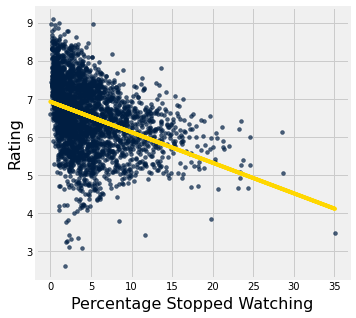

In [ ]:
scatter_fit(anime3,'Percentage Stopped Watching','Rating')

In [ ]:
correlation(anime3,'Percentage Stopped Watching','Rating')

-0.36820653340242765

In this instance, the percentage of members who stopped watching and rating has a low negative correlation, meaning that both features are loosley related. BUT ONLY BECAUSE the type of anime was not specified so Movies, ONAs, OVAs, TV, and Music were all grouped together. When we narrow down our dataset, that's when we will start to see stronger correlations. That's why this correlation is not as useful as it seems, and the low correlation proves it.

##Question 1: Can we predict the percentage of people who stop watching an anime based on the rating of the anime tv show.

Let's use the simplified 'anime3' dataset and make a new table called 'anime_tv' using anime with the "Type" tv only. Let's use regression to predict the percentage.

###New 'anime_tv' Table

In [ ]:
anime_tv = anime3.select('Name','Rating','Type','Episodes','Members','Stopped Watching','Percentage Stopped Watching').where('Type', 'TV')
anime_tv.show(5)

Name,Rating,Type,Episodes,Members,Stopped Watching,Percentage Stopped Watching
YAT Anshin! Uchuu Ryokou,6.98,TV,50,1611,119,7.38672
Senki Zesshou Symphogear XV,8.21,TV,13,28318,627,2.21414
Saiyuuki Reload Gunlock,7.42,TV,26,19393,519,2.67622
Wild Arms: Twilight Venom,6.66,TV,22,6728,458,6.80737
Listeners,5.38,TV,12,49237,11703,23.7687


###Scatter Plots and Histogram

We can run a scatter fit of the modified anime dataset to really see the difference in regression between this scatterplot and the scatterplot of the anime dataset that includes all the types in the 'Type' column.

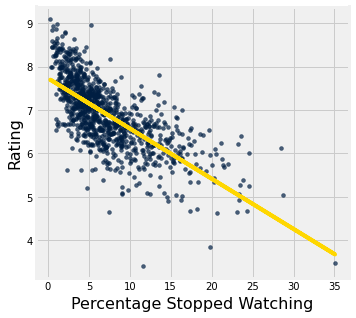

In [ ]:
anime_tv_scatter = scatter_fit(anime_tv, 'Percentage Stopped Watching', 'Rating')

In [ ]:
anime_tv_slope = slope(anime_tv, 'Percentage Stopped Watching', 'Rating')
anime_tv_slope

-0.11569840575060175

In [ ]:
anime_tv_intercept = intercept(anime_tv, 'Percentage Stopped Watching', 'Rating')
anime_tv_intercept

7.732494963143735

The regression line is:

$$y = -0.1157 * x + 7.7325$$

where y is Rating and x is Percentage Stopped Watching. This means, that when we think the percentage of people who stop watching an anime is zero, then the the minimum rating that anime can get is 7.7325, which is a pretty well rated anime.

In [ ]:
correlation(anime_tv, 'Percentage Stopped Watching', 'Rating')

-0.7059771080132751

We can now see that there is a STRONG correlation between the percentage of people who stop watching an anime tv show and the rating of the tv show. In other words, the lower the rating of the show, the more people who give up watching it.

Now let's build a residual plot to determine the residuals against our predictor variable, which is "Percentage Stopped Watching". The function `residual_plot` does that.

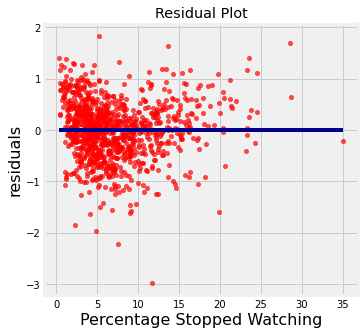

In [ ]:
anime_tv_residuals = residual_plot(anime_tv, 'Percentage Stopped Watching','Rating')

We now have a slightly better visualization of the distribution of percentages, with 0-15% being concentrated. We also have lower valued residuals giving us a lower variance of data and a stronger correlation. For an even better look at the distribution of percentages, let's look at a histogram.

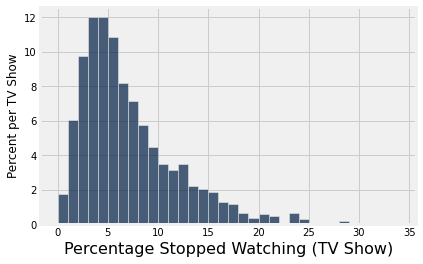

In [ ]:
percentage_stopped_bins = np.arange(0, 35, 1)
anime_tv_hist = anime_tv.hist('Percentage Stopped Watching', bins = percentage_stopped_bins, unit = 'TV Show')

We can see our percentages are right skewed with a majority of our 'anime_tv' dataset having around 4-5 percent of viewers stop watching the corresponding anime.

###Bootstrapped Slope and Scatter Plot

To start our prediction, we can try bootstrapping our original slopes and scatterplot.

In [ ]:
slopes = make_array() # make a blank array to store my bootstrap slopes

for i in np.arange(1000): # we will run the loop for 1000 reps
    # 1000 bootstrap slope values
    bootstrap_sample = anime_tv.sample()
    bootstrap_slope = slope(bootstrap_sample, 'Percentage Stopped Watching', 'Rating')
    # compute the slope of a regression line based on the bootstrapped sample
    slopes = np.append(slopes, bootstrap_slope)
    # add the slope we just calculated to the slopes array

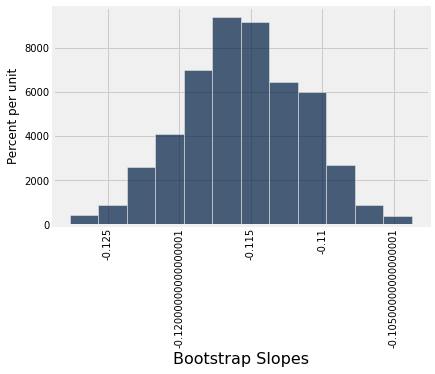

In [ ]:
Table().with_column('Bootstrap Slopes', slopes).hist(bins=12)
# store my array of slopes in a table and make a histogram

In [ ]:
left = percentile(2.5, slopes)
right = percentile(97.5, slopes)
left, right

(-0.12382765575657832, -0.10764525907195978)

It is now plausible to use the regression line to predict other values in the anime_tv dataset.

Suppose I ran an anime production studio and wanted to know how bad our show could be potentially be rated if it hasn't yet been rated, to have 15% of all our viewerbase to suddenly stop watching. Let x be 15. Y, which is our estimated Rating, is then approximately equal to 5.99, which is an indecent rating.

Bootstrapping a scatterplot can give an estimated confidence interval to help us predict the statistics of a population, in this case, the anime tv show dataset average rating.

##Question 2: A/B Testing of Average Ratings of Anime Movies vs Anime TV

In [ ]:
anime_movies = anime3.where('Type', 'Movie').sort('Rating', descending = True)
anime_movies.show(5)

Name,Rating,Genre,Type,Episodes,Source,Rank,Members,Stopped Watching,Percentage Stopped Watching
Kimi no Na wa.,8.96,"Romance, Supernatural, School, Drama",Movie,1,Original,16,1726660,2463,0.142645
Fate/stay night Movie: Heaven's Feel - III. Spring Song,8.79,"Action, Supernatural, Magic, Fantasy",Movie,1,Visual novel,26,127531,250,0.196031
Seishun Buta Yarou wa Yumemiru Shoujo no Yume wo Minai,8.68,"Supernatural, Drama, Romance, School",Movie,1,Light novel,46,359086,868,0.241725
Kimi no Suizou wo Tabetai,8.59,Drama,Movie,1,Novel,74,437815,947,0.216301
Gintama Movie 1: Shinyaku Benizakura-hen,8.52,"Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen",Movie,1,Manga,96,116327,637,0.547594


In [ ]:
anime_movies_rating_mean = np.mean(anime_movies.column('Rating'))
anime_movies_rating_mean

6.50686541737649

In [ ]:
anime_tv1 = anime3.where('Type', 'TV').sort('Rating', descending = True)
anime_tv1.show(5)

Name,Rating,Genre,Type,Episodes,Source,Rank,Members,Stopped Watching,Percentage Stopped Watching
Shingeki no Kyojin Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Shounen, Supe ...",TV,10,Manga,4,1073626,3099,0.288648
Gintama.,8.99,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,12,Manga,12,201735,2273,1.12673
Gintama,8.96,"Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen",TV,201,Manga,15,754607,39531,5.23862
Owarimonogatari 2nd Season,8.93,"Mystery, Comedy, Supernatural, Vampire",TV,7,Light novel,17,270878,1697,0.626481
Gintama.: Shirogane no Tamashii-hen - Kouhan-sen,8.86,"Action, Sci-Fi, Comedy, Historical, Parody, Samurai, Shounen",TV,14,Manga,21,114591,1080,0.942482


In [ ]:
anime_tv1_rating_mean = np.mean(anime_tv1.column('Rating'))
anime_tv1_rating_mean

6.913664717348928

###Modifying 'anime3' Dataset

In [ ]:
anime4 = anime3.where('Type', are.not_equal_to('ONA')).where('Type', are.not_equal_to('OVA')).where('Type', are.not_equal_to('Music')).where('Type', are.not_equal_to('Special'))
anime4

Name,Rating,Genre,Type,Episodes,Source,Rank,Members,Stopped Watching,Percentage Stopped Watching
YAT Anshin! Uchuu Ryokou,6.98,"Adventure, Comedy, Sci-Fi, Shounen",TV,50,Original,3725,1611,119,7.38672
Flanders no Inu (Movie),7.86,"Drama, Historical",Movie,1,Novel,720,17195,168,0.977028
Senki Zesshou Symphogear XV,8.21,"Action, Music, Sci-Fi",TV,13,Original,302,28318,627,2.21414
Saiyuuki Reload Gunlock,7.42,"Action, Adventure, Comedy, Demons, Drama, Josei, Superna ...",TV,26,Manga,1840,19393,519,2.67622
Wild Arms: Twilight Venom,6.66,"Action, Sci-Fi, Adventure, Magic, Vampire, Fantasy",TV,22,Game,5112,6728,458,6.80737
Listeners,5.38,"Action, Mecha, Music, Sci-Fi",TV,12,Original,9967,49237,11703,23.7687
Glass no Kamen Desu ga to Z,6.09,"Comedy, Parody",TV,14,Unknown,7850,667,69,10.3448
Hataage! Kemono Michi,6.69,"Comedy, Fantasy, Shounen",TV,12,Manga,4967,135278,11817,8.73534
Inu x Boku SS,7.46,"Comedy, Supernatural, Romance, Shounen",TV,12,Manga,1693,404817,16089,3.97439
No Game No Life: Zero - Manner Movie,6.86,Comedy,Movie,1,Unknown,4199,21059,322,1.52904


In [ ]:
type_and_rating = anime4.select('Type', 'Rating')
type_and_rating

Type,Rating
TV,6.98
Movie,7.86
TV,8.21
TV,7.42
TV,6.66
TV,5.38
TV,6.09
TV,6.69
TV,7.46
Movie,6.86


In [ ]:
type_and_rating.group('Type')

Type,count
Movie,587
TV,1026


Let’s look at the distribution of the ratings of the anime of movie type compared to those of tv type. To generate two overlaid histograms, we will use hist with the optional group argument which is a column label or index. The rows of the table are first grouped by this column and then a histogram is drawn for each one.

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:483: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Type,Rating
TV,6.98
Movie,7.86
TV,8.21
TV,7.42
TV,6.66
TV,5.38
TV,6.09
TV,6.69
TV,7.46
Movie,6.86


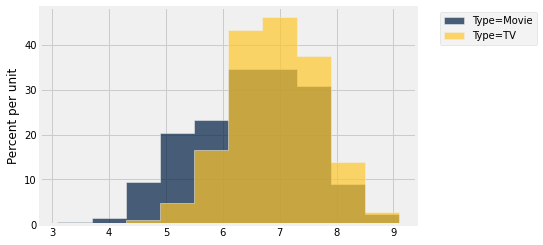

In [ ]:
type_and_rating.hist('Rating', group = 'Type')
type_and_rating

###Hypotheses

**Null Hypothesis:** Regardless of the 'Type' of anime, ('Movie, 'TV'), the average of all the ratings in 'Rating' for 'Movie' is approximately the same for 'TV' with a tolerance of '0.25'.

μ1=μ2


**Alternative Hypothesis:** In the dataset, the anime movies have a lower rating, on average, than anime tv shows (with tolerance of '0.25').

μ1<μ2



In [ ]:
means_table = type_and_rating.group('Type', np.average)
means_table

Type,Rating average
Movie,6.50687
TV,6.91366


In [ ]:
means = means_table.column(1)
observed_difference = means.item(1) - means.item(0)
observed_difference

0.40679929997243747

Our test statistic is about 0.4068. We're now going to repeatedly compute the differences in the simulations below by writing a function to take the difference in means of the Movie group and TV group.

In [ ]:
def difference_of_means(table, label, group_label):
    reduced = table.select(label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

In [ ]:
difference_of_means(anime4, 'Rating', 'Type')

0.40679929997243747

###Predicting the Statistic Under the Null Hypothesis

Now it's time to take the difference of the two new group means. This will be a simulated value of the test statistic under the null hypothesis.

In [ ]:
type_and_rating

Type,Rating
TV,6.98
Movie,7.86
TV,8.21
TV,7.42
TV,6.66
TV,5.38
TV,6.09
TV,6.69
TV,7.46
Movie,6.86


We will shuffle all the labels without replacement, then the sample will include all the rows of the table, in random order.

In [ ]:
shuffled_labels = type_and_rating.sample(with_replacement = False).column(0)
original_and_shuffled = type_and_rating.with_column('Shuffled Label', shuffled_labels)

In [ ]:
original_and_shuffled

Type,Rating,Shuffled Label
TV,6.98,TV
Movie,7.86,TV
TV,8.21,TV
TV,7.42,TV
TV,6.66,TV
TV,5.38,Movie
TV,6.09,TV
TV,6.69,Movie
TV,7.46,Movie
Movie,6.86,TV


Each rating now has a random corresponding movie/tv label in the column Shuffled Label, while the original label is in 'Type'. If the null hypothesis is true, all the random re-arrangements of the labels should be equally likely.

In [ ]:
shuffled_only = original_and_shuffled.drop('Type')
shuffled_group_means = shuffled_only.group('Shuffled Label', np.average)
shuffled_group_means

Shuffled Label,Rating average
Movie,6.78455
TV,6.7548


In [ ]:
difference_of_means(original_and_shuffled, 'Rating', 'Shuffled Label')

-0.029753230321688307

In [ ]:
difference_of_means(original_and_shuffled, 'Rating', 'Type')

0.40679929997243747

One simulation isn't enough to account for the variability, so we have to simulate it multiple times to see if a larger difference could have occurred.

Here we can test for 'one_simulated_difference' so it returns the difference of means of two groups formed by randomly shuffling all the labels.

In [ ]:
def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False
                                                    ).column(group_label)
    shuffled_table = table.select(label).with_column(
        'Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, label, 'Shuffled Label')   

In [ ]:
one_simulated_difference(anime4, 'Rating', 'Type')

-0.04301050041344112

###Permutation Test

Time to simulate our test statistic many times and collect the differences in an array.

In [ ]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(anime4, 'Rating', 'Type')
    differences = np.append(differences, new_difference)                               

###Conclusion of the Test

The histogram below shows the empirical distribution of 5000 values of the test statistic, based on the null hypothesis.

Observed Difference: 0.40679929997243747


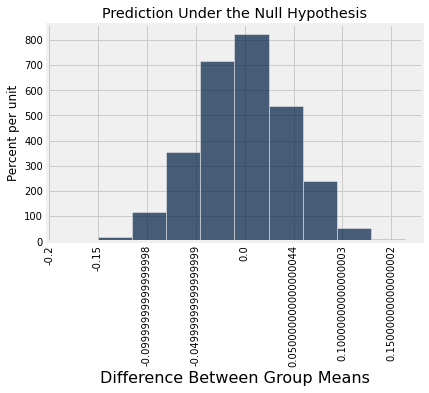

In [ ]:
Table().with_column('Difference Between Group Means', differences).hist()
print('Observed Difference:', observed_difference)
plots.title('Prediction Under the Null Hypothesis');

The distribution is centered around 0, which makes sense because under the null hypothesis, the two groups have roughly the same average. Therefore the difference between the averages should be 0. But in the original sample, the difference was about 0.407. There is not enough sufficient evidence to support the null hypothesis so the test supports the alternative hypothesis. The average rating of anime movies is less than the average rating of anime tv shows.